<h2><strong>Import Libraries</strong></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import gc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
# Change Pandas Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  

<h2><strong>DO NOT RUN UNLESS YOU WANT A NEW SAMPLE</strong></h2>

In [3]:
# # Create a sample size we want
# sample_fraction = 500000 / 16000000

# # Read a sample of the csv
# df_sample = pd.read_csv('battles.csv', skiprows=lambda i: i > 0 and random.random() > sample_fraction)

# # Create new csv for sample
# df_sample.to_csv('battles_sample_500k.csv', index=False)

<h2><strong>Read and Verify CSV</strong></h2>

In [4]:
# Read CSV
df = pd.read_csv('battles_sample_500k.csv')

# Print first five lines of CSV
print(df.head())

   Unnamed: 0                 battleTime    arena.id  gameMode.id  average.startingTrophies  winner.tag  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints winner.princessTowersHitPoints winner.clan.tag  winner.clan.badgeId   loser.tag  loser.startingTrophies  loser.trophyChange  loser.crowns  loser.kingTowerHitPoints loser.clan.tag  loser.clan.badgeId loser.princessTowersHitPoints  tournamentTag  winner.card1.id  winner.card1.level  winner.card2.id  winner.card2.level  winner.card3.id  winner.card3.level  winner.card4.id  winner.card4.level  winner.card5.id  winner.card5.level  winner.card6.id  winner.card6.level  winner.card7.id  winner.card7.level  winner.card8.id  winner.card8.level                                  winner.cards.list  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.id  \
0   

<h2><strong>Data Cleaning & Initial Inspection</strong></h2>

In [5]:
# Shape of Dataframe
print(df.shape)

(525124, 74)


In [6]:
# All Columns in Dataframe
cols = df.columns.tolist()
print(cols)

['Unnamed: 0', 'battleTime', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.tag', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.tag', 'loser.clan.badgeId', 'loser.princessTowersHitPoints', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.cards.list', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',

In [7]:
# Print Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['Unnamed: 0', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.clan.badgeId', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.badgeId', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average', 'loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 'loser.card3.id', 'loser.card3.level',
       'loser.car

In [8]:
# Print Data Types of Each Column
print(df.dtypes)

Unnamed: 0                          int64
battleTime                         object
arena.id                          float64
gameMode.id                       float64
average.startingTrophies          float64
winner.tag                         object
winner.startingTrophies           float64
winner.trophyChange               float64
winner.crowns                     float64
winner.kingTowerHitPoints         float64
winner.princessTowersHitPoints     object
winner.clan.tag                    object
winner.clan.badgeId               float64
loser.tag                          object
loser.startingTrophies            float64
loser.trophyChange                float64
loser.crowns                      float64
loser.kingTowerHitPoints          float64
loser.clan.tag                     object
loser.clan.badgeId                float64
loser.princessTowersHitPoints      object
tournamentTag                     float64
winner.card1.id                     int64
winner.card1.level                

In [9]:
# Null Values
print(df.isnull().sum())

Unnamed: 0                             0
battleTime                             0
arena.id                               0
gameMode.id                            0
average.startingTrophies               0
winner.tag                             0
winner.startingTrophies                0
winner.trophyChange                    0
winner.crowns                          0
winner.kingTowerHitPoints              0
winner.princessTowersHitPoints     11326
winner.clan.tag                    22197
winner.clan.badgeId                22197
loser.tag                              0
loser.startingTrophies                 0
loser.trophyChange                     0
loser.crowns                           0
loser.kingTowerHitPoints          157402
loser.clan.tag                     29480
loser.clan.badgeId                 29480
loser.princessTowersHitPoints     286868
tournamentTag                     525124
winner.card1.id                        0
winner.card1.level                     0
winner.card2.id 

In [10]:
# Print Number of Unique Values
print(df.nunique())

Unnamed: 0                        525124
battleTime                        389654
arena.id                              15
gameMode.id                            4
average.startingTrophies           11870
winner.tag                        468204
winner.startingTrophies             6452
winner.trophyChange                   45
winner.crowns                          3
winner.kingTowerHitPoints           5836
winner.princessTowersHitPoints    209861
winner.clan.tag                   242963
winner.clan.badgeId                  180
loser.tag                         471485
loser.startingTrophies              6523
loser.trophyChange                    52
loser.crowns                           3
loser.kingTowerHitPoints            5833
loser.clan.tag                    245943
loser.clan.badgeId                   180
loser.princessTowersHitPoints       3640
tournamentTag                          0
winner.card1.id                      102
winner.card1.level                    13
winner.card2.id 

<h5>Handling Null Values & Dropping Uninfluential Columns</h5>

In [11]:
# Dropping Columns (Columns with not mutch meaning/influence)
df = df.drop(columns=['Unnamed: 0', 'winner.tag', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag' ])

In [12]:
# Resolving Null Values to 0
df['winner.princessTowersHitPoints'] = df['winner.princessTowersHitPoints'].fillna(0)
df['loser.kingTowerHitPoints'] = df['loser.kingTowerHitPoints'].fillna(0)
df['loser.princessTowersHitPoints'] = df['loser.princessTowersHitPoints'].fillna(0)

In [13]:
# Reason we are able to resolve null values to 0

# Only appears when loser crowns is 2 which means that both winner and loser princess towers are destroyed (0 hitpoints)
print('Winner Princess Tower Hit Points to Loser Crowns:')
print(df.groupby(df['winner.princessTowersHitPoints'].isna())['loser.crowns'].describe())

# Null values appear when winner crowns is 3, which means that the king tower was destroyed (0 hit points)
print('\nLoser King Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.kingTowerHitPoints'].isna())['winner.crowns'].describe())

# # Null values appear only when both princess towers are destroyed (0 hit points)
print('\nLoser Princess Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.princessTowersHitPoints'].isna())['winner.crowns'].describe())

Winner Princess Tower Hit Points to Loser Crowns:
                                   count      mean      std  min  25%  50%  75%  max
winner.princessTowersHitPoints                                                      
False                           525124.0  0.335544  0.51584  0.0  0.0  0.0  1.0  2.0

Loser King Tower Hit Points to Winner Crowns:
                             count      mean       std  min  25%  50%  75%  max
loser.kingTowerHitPoints                                                       
False                     525124.0  1.846029  0.854254  1.0  1.0  2.0  3.0  3.0

Loser Princess Tower Hit Points to Winner Crowns:
                                  count      mean       std  min  25%  50%  75%  max
loser.princessTowersHitPoints                                                       
False                          525124.0  1.846029  0.854254  1.0  1.0  2.0  3.0  3.0


In [14]:
# Check for null values again
print(df.isnull().sum())

battleTime                        0
arena.id                          0
gameMode.id                       0
average.startingTrophies          0
winner.startingTrophies           0
winner.trophyChange               0
winner.crowns                     0
winner.kingTowerHitPoints         0
winner.princessTowersHitPoints    0
loser.startingTrophies            0
loser.trophyChange                0
loser.crowns                      0
loser.kingTowerHitPoints          0
loser.princessTowersHitPoints     0
winner.card1.id                   0
winner.card1.level                0
winner.card2.id                   0
winner.card2.level                0
winner.card3.id                   0
winner.card3.level                0
winner.card4.id                   0
winner.card4.level                0
winner.card5.id                   0
winner.card5.level                0
winner.card6.id                   0
winner.card6.level                0
winner.card7.id                   0
winner.card7.level          

<h5>Map Card ID's to Actual Card Names</h5>

In [15]:
# Map out card ID's to actual card names

card_map = {
    26000000: "Knight", 26000001: "Archers", 26000002: "Goblins", 26000003: "Giant",
    26000004: "P.E.K.K.A", 26000005: "Minions", 26000006: "Balloon", 26000007: "Witch",
    26000008: "Barbarians", 26000009: "Golem", 26000010: "Skeletons", 26000011: "Valkyrie",
    26000012: "Skeleton Army", 26000013: "Bomber", 26000014: "Musketeer", 26000015: "Baby Dragon",
    26000016: "Prince", 26000017: "Wizard", 26000018: "Mini P.E.K.K.A", 26000019: "Spear Goblins",
    26000020: "Giant Skeleton", 26000021: "Hog Rider", 26000022: "Minion Horde", 26000023: "Ice Wizard",
    26000024: "Royal Giant", 26000025: "Guards", 26000026: "Princess", 26000027: "Dark Prince",
    26000028: "Three Musketeers", 26000029: "Lava Hound", 26000030: "Ice Spirit", 26000031: "Fire Spirits",
    26000032: "Miner", 26000033: "Sparky", 26000034: "Bowler", 26000035: "Lumberjack", 26000036: "Battle Ram",
    26000037: "Inferno Dragon", 26000038: "Ice Golem", 26000039: "Mega Minion", 26000040: "Dart Goblin",
    26000041: "Goblin Gang", 26000042: "Electro Wizard", 26000043: "Elite Barbarians", 26000044: "Hunter",
    26000045: "Executioner", 26000046: "Bandit", 26000047: "Royal Recruits", 26000048: "Night Witch",
    26000049: "Bats", 26000050: "Royal Ghost", 26000051: "Ram Rider", 26000052: "Zappies",
    26000053: "Rascals", 26000054: "Cannon Cart", 26000055: "Mega Knight", 26000056: "Skeleton Barrel",
    26000057: "Flying Machine", 26000058: "Wall Breakers", 26000059: "Royal Hogs", 26000060: "Goblin Giant",
    26000061: "Fisherman", 26000062: "Magic Archer", 26000063: "Electro Dragon", 26000064: "Firecracker",
    26000067: "Elixir Golem", 26000068: "Battle Healer", 26000080: "Skeleton Dragons", 26000083: "Mother Witch",
    26000084: "Electro Spirit", 26000085: "Electro Giant", 27000000: "Cannon", 27000001: "Goblin Hut",
    27000002: "Mortar", 27000003: "Inferno Tower", 27000004: "Bomb Tower", 27000005: "Barbarian Hut",
    27000006: "Tesla", 27000007: "Elixir Collector", 27000008: "X-Bow", 27000009: "Tombstone",
    27000010: "Furnace", 27000012: "Goblin Cage", 28000000: "Fireball", 28000001: "Arrows",
    28000002: "Rage", 28000003: "Rocket", 28000004: "Goblin Barrel", 28000005: "Freeze",
    28000006: "Mirror", 28000007: "Lightning", 28000008: "Zap", 28000009: "Poison",
    28000010: "Graveyard", 28000011: "The Log", 28000012: "Tornado", 28000013: "Clone",
    28000014: "Earthquake", 28000015: "Barbarian Barrel", 28000016: "Heal Spirit",
    28000017: "Giant Snowball", 28000018: "Royal Delivery"
}

card_cols = [
    'winner.card1.id', 'winner.card2.id', 'winner.card3.id', 'winner.card4.id',
    'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id',
    'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id',
    'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id'
]

for col in card_cols:
    df[col] = df[col].map(card_map)

# Check first few replacements
print(df[card_cols].head())


  winner.card1.id winner.card2.id   winner.card3.id winner.card4.id winner.card5.id   winner.card6.id   winner.card7.id   winner.card8.id  loser.card1.id loser.card2.id  loser.card3.id    loser.card4.id loser.card5.id  loser.card6.id loser.card7.id loser.card8.id
0          Knight     Baby Dragon         Skeletons       Musketeer      Goblin Hut            Poison         Graveyard  Barbarian Barrel       P.E.K.K.A      Ram Rider             Zap            Poison         Knight  Electro Wizard    Firecracker        Furnace
1          Knight     Cannon Cart            Mortar          Hunter       Graveyard     Spear Goblins  Barbarian Barrel            Poison  Inferno Dragon      Hog Rider  Electro Wizard            Bandit         Bowler         Tornado         Freeze            Zap
2         Rascals     Goblin Gang       Dart Goblin          Rocket          Prince     Goblin Barrel          Princess           The Log          Rocket    Goblin Gang   Goblin Barrel            Knight     I

<h2><strong>Exploratory Data Analysis</strong></h2>

In [16]:
# Summary Statistics
print(df.describe())

           arena.id   gameMode.id  average.startingTrophies  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  loser.startingTrophies  loser.trophyChange   loser.crowns  loser.kingTowerHitPoints  winner.card1.level  winner.card2.level  winner.card3.level  winner.card4.level  winner.card5.level  winner.card6.level  winner.card7.level  winner.card8.level  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.level  loser.card2.level  loser.card3.level  loser.card4.level  loser.card5.level  loser.card6.level  loser.card7.level  loser.card8.level  loser.totalcard.level  loser.troop.count  loser.structure.count  loser.spell.count  loser.common.count  loser.rare.count  loser.epic.count  loser.legendary.count  loser.elixir.average
count  5.251240e+05  5.251240e+05             525124.000000            52512

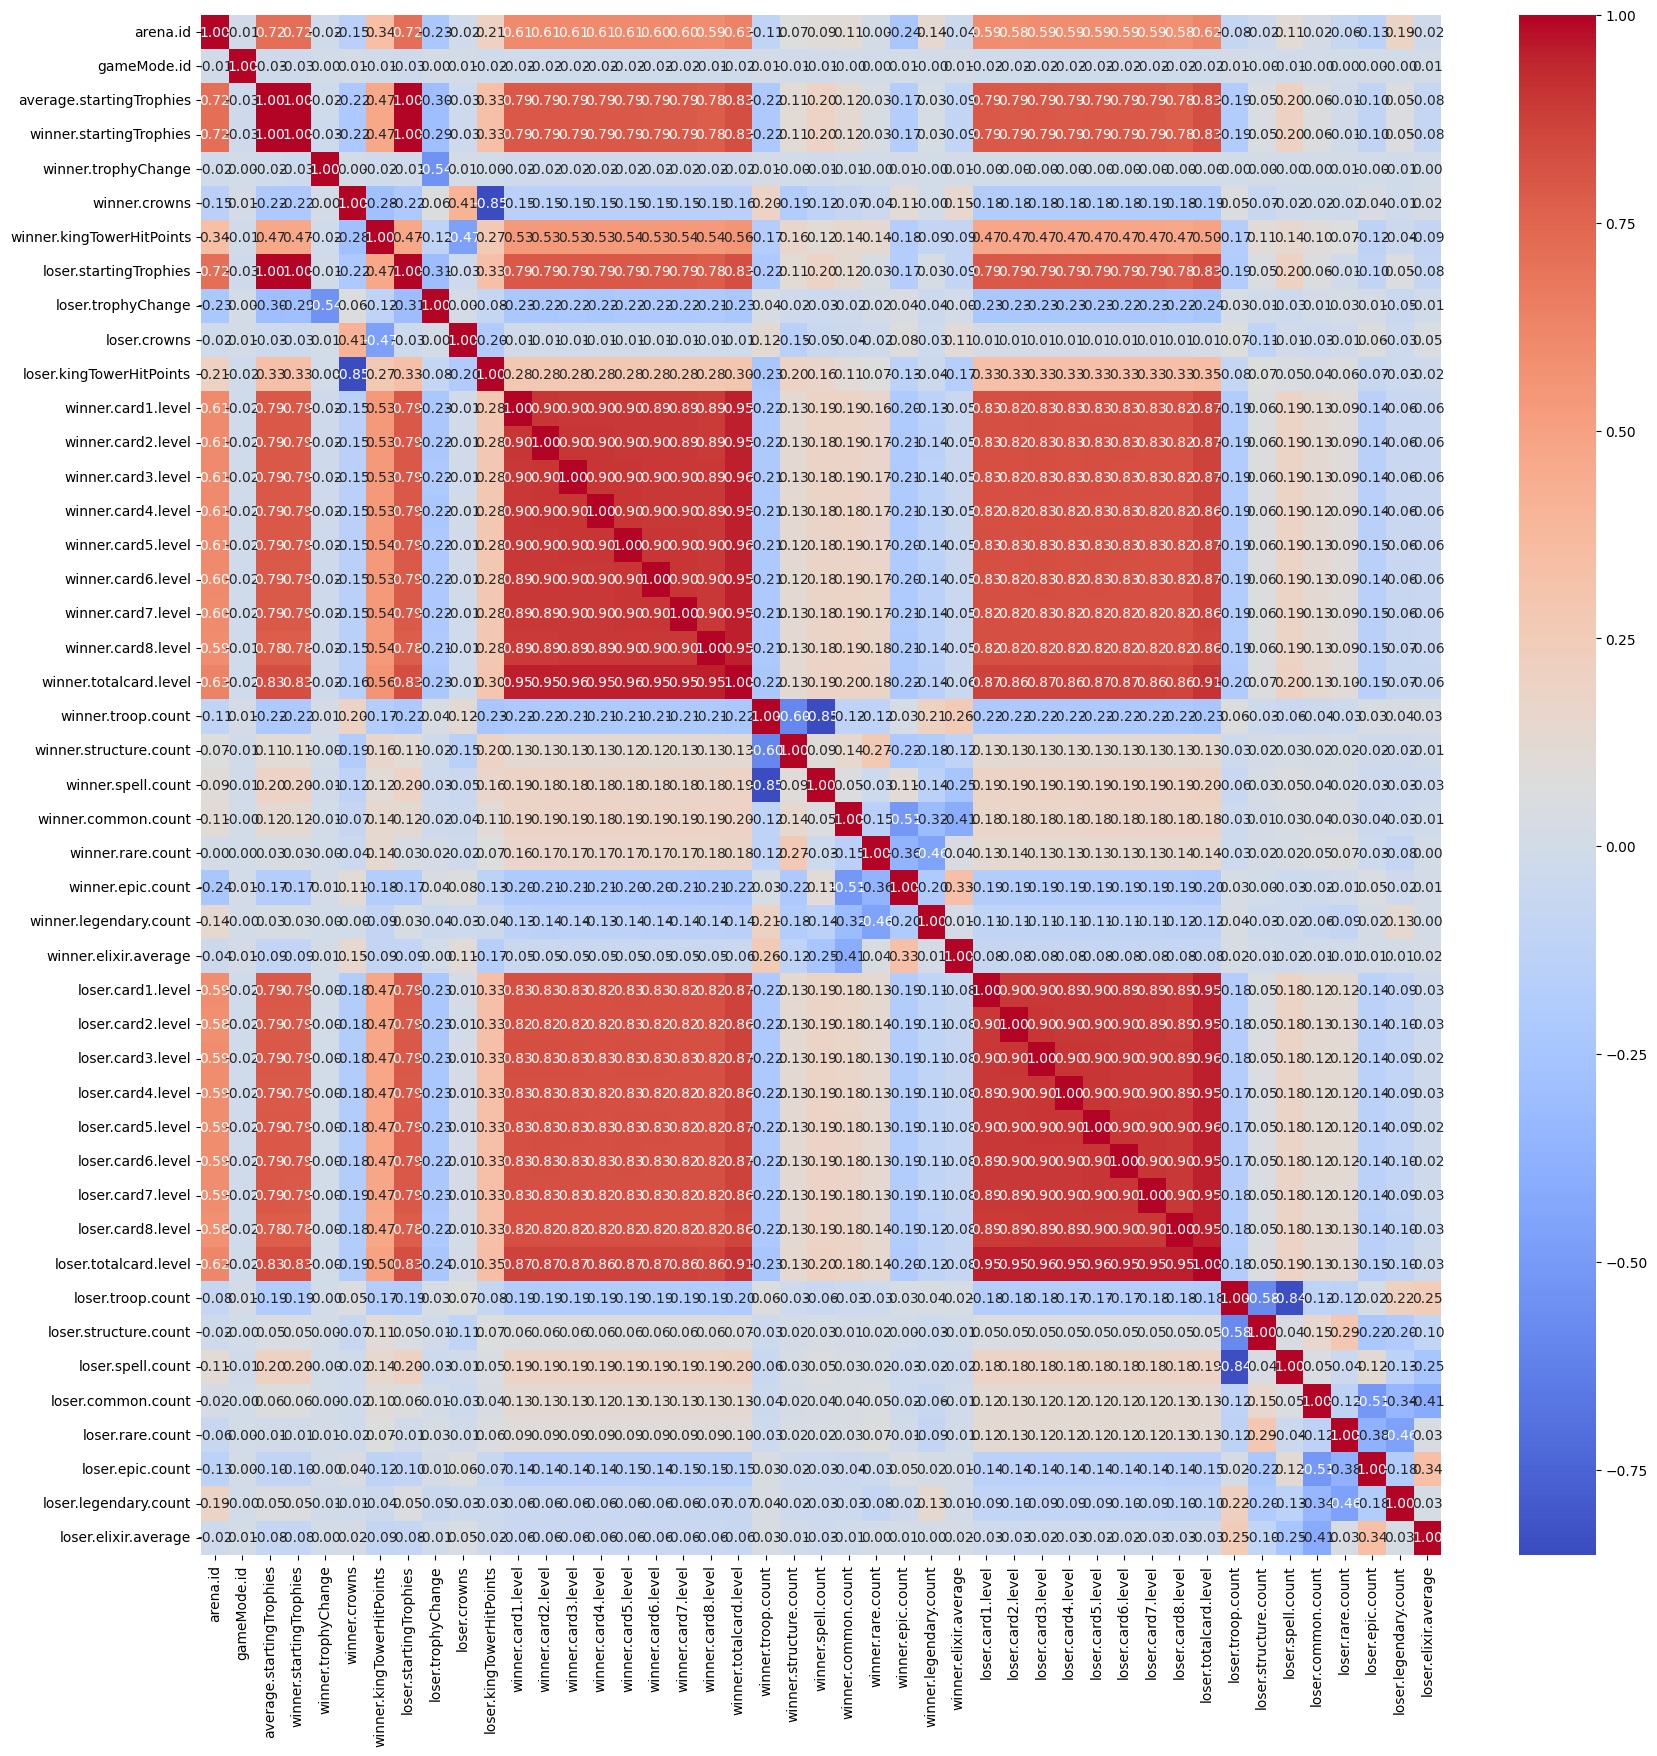

In [17]:
# Correlation Heatmap (How much does one variable affect the other)
plt.figure(figsize=(20, 20))
co_mtx = df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

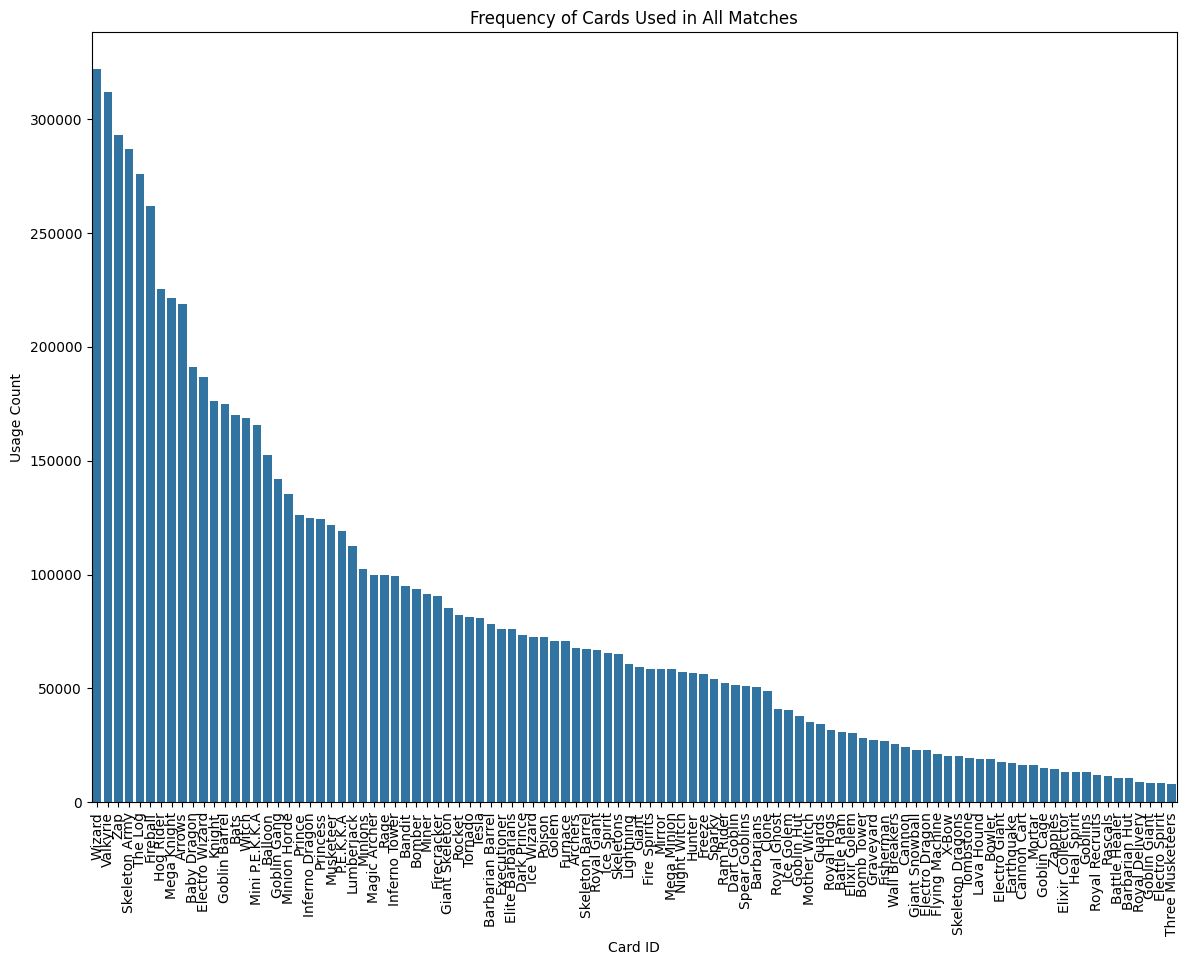

In [18]:
# Bar Plot of Cards used the most
all_cards = df[card_cols].values.flatten()
card_counts = pd.Series(all_cards).value_counts()


plt.figure(figsize=(14, 10))
sns.barplot(x=card_counts.index, y=card_counts.values)
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()

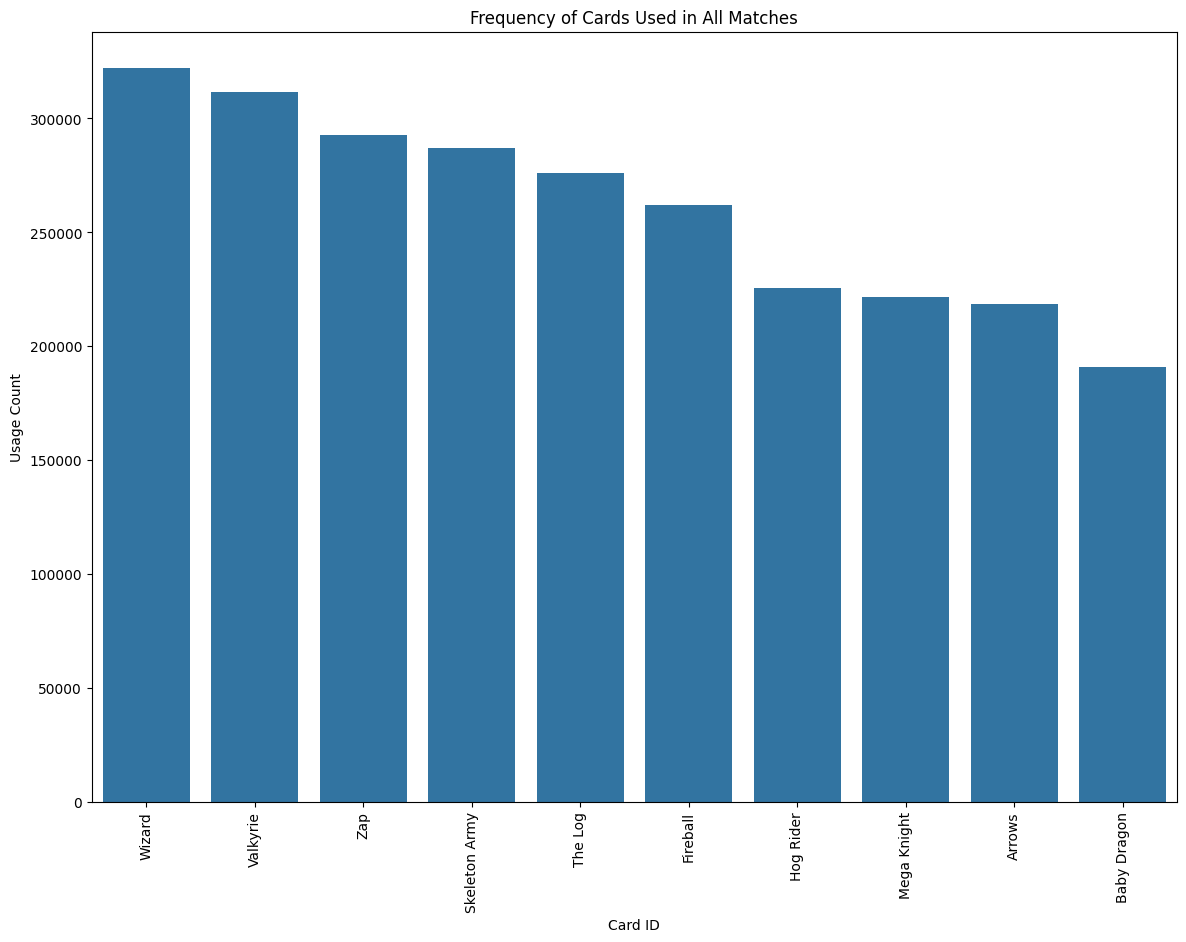

In [19]:
# Show the ten most used cards
top10 = card_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()

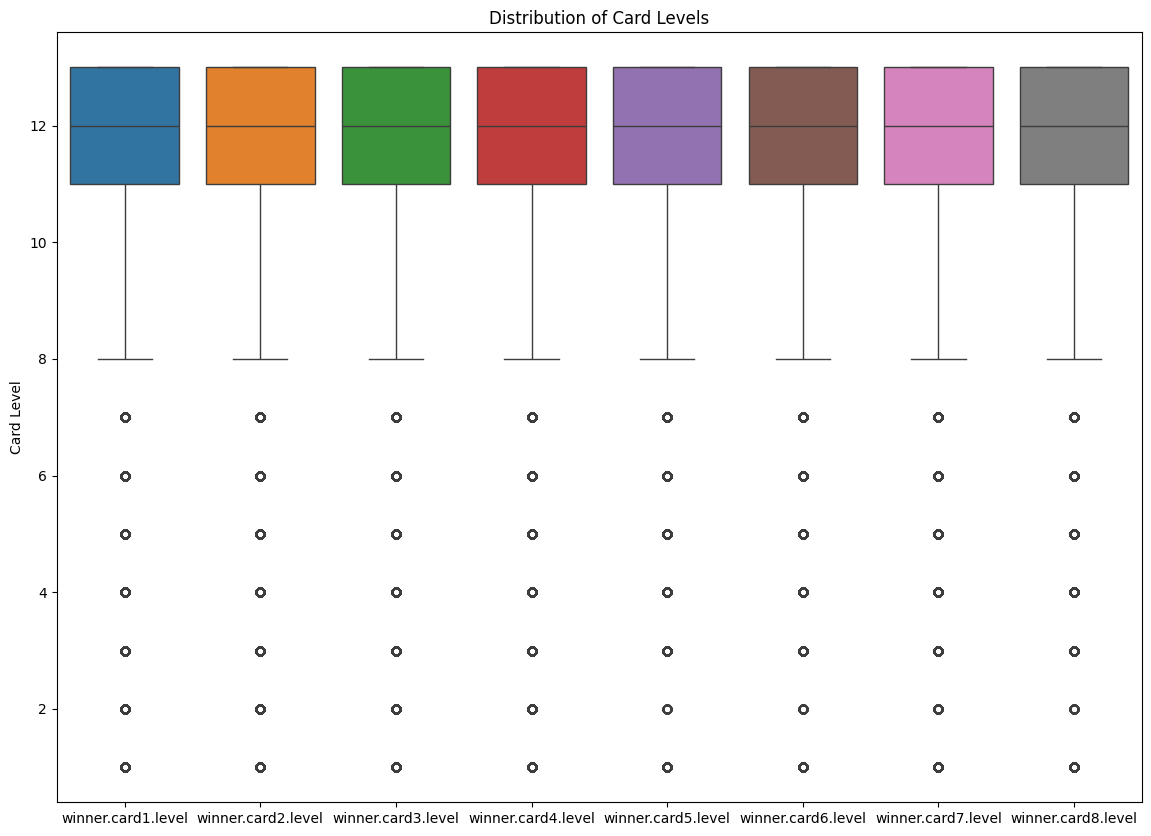

In [20]:
# Box plot of card levels
card_levels = [f'winner.card{i}.level' for i in range(1, 9)] + [f'winner.card{i}.level' for i in range(1, 9)]

plt.figure(figsize=(14, 10))
sns.boxplot(data=df[card_levels])
plt.title('Distribution of Card Levels')
plt.ylabel('Card Level')
plt.show()

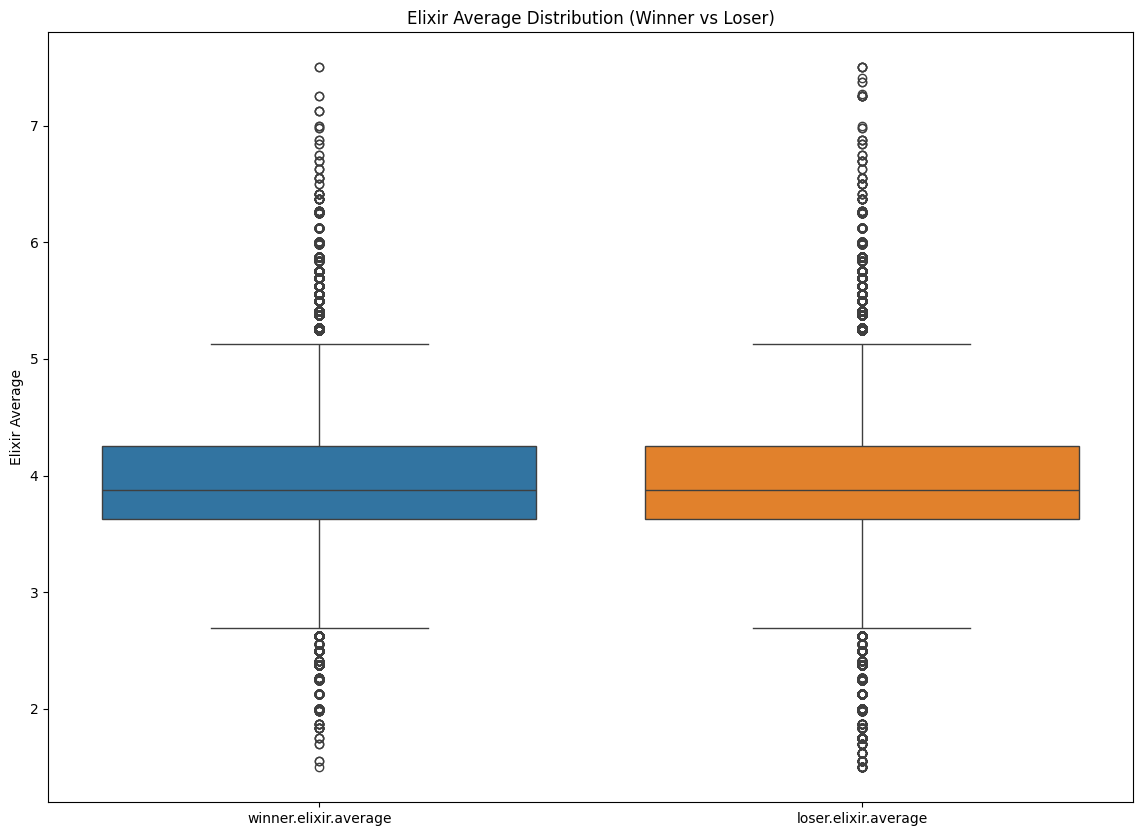

In [21]:
# Box plot of Winner Elixir Average vs Loser Elixir Average
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[['winner.elixir.average', 'loser.elixir.average']])
plt.title("Elixir Average Distribution (Winner vs Loser)")
plt.ylabel("Elixir Average")
plt.show()

# Shows that elixir average alone doesn't determine match outcomes

<h2><strong>Data Prep for Model Building</strong></h2>

<h5>Create Baseline DataFrames Which Will Be Used To Create Two Main DataFrames</h5>

In [22]:
# Create 2 dataframes, one with winning decks, another with losing decks and their outcomes

win_df = df[['winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 
             'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 
             'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 
             'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 
             'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 
             'winner.elixir.average']].copy()
win_df['target'] = 1

lose_df = df[['loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 'loser.card3.id',
              'loser.card3.level', 'loser.card4.id', 'loser.card4.level', 'loser.card5.id', 'loser.card5.level', 
              'loser.card6.id', 'loser.card6.level', 'loser.card7.id', 'loser.card7.level', 'loser.card8.id', 
              'loser.card8.level', 'loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 
              'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 
              'loser.elixir.average']].copy()
lose_df['target'] = 0


In [23]:
# Transform win_df so that each column is each and every card in the dataset and will either have a value of 0 or its level depending on if the card is in that deck

win_card_cols = [f'winner.card{i}.id' for i in range(1, 9)]
win_card_levels = [f'winner.card{i}.level' for i in range(1, 9)]

win_cards_long = pd.DataFrame({
    'deck': win_df.index.repeat(8),
    'card_id': win_df[win_card_cols].values.flatten(),
    'card_level': win_df[win_card_levels].values.flatten(),
    'target': win_df['target'].repeat(8)
})

win_cards_long = win_cards_long.pivot_table(
    index = 'deck',
    columns = 'card_id',
    values = 'card_level',
    fill_value = 0
)

win_numeric_cols = win_df[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 
             'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 
             'winner.elixir.average']].reset_index(drop=True)

win_numeric_cols = win_numeric_cols.rename(columns={
    'winner.totalcard.level': 'totalcard_level',
    'winner.troop.count': 'troop_count',
    'winner.structure.count': 'structure_count',
    'winner.spell.count': 'spell_count',
    'winner.common.count': 'common_count',
    'winner.rare.count': 'rare_count',
    'winner.epic.count': 'epic_count',
    'winner.legendary.count': 'legendary_count',
    'winner.elixir.average': 'elixir_average'
})


final_win_df = pd.concat([win_numeric_cols, win_cards_long.reset_index(drop=True)], axis=1)
final_win_df['target'] = win_df['target'].values

print(final_win_df.head())
print(final_win_df.shape)


   totalcard_level  troop_count  structure_count  spell_count  common_count  rare_count  epic_count  legendary_count  elixir_average  Archers  Arrows  Baby Dragon  Balloon  Bandit  Barbarian Barrel  Barbarian Hut  Barbarians  Bats  Battle Healer  Battle Ram  Bomb Tower  Bomber  Bowler  Cannon  Cannon Cart  Clone  Dark Prince  Dart Goblin  Earthquake  Electro Dragon  Electro Giant  Electro Spirit  Electro Wizard  Elite Barbarians  Elixir Collector  Elixir Golem  Executioner  Fire Spirits  Fireball  Firecracker  Fisherman  Flying Machine  Freeze  Furnace  Giant  Giant Skeleton  Giant Snowball  Goblin Barrel  Goblin Cage  Goblin Gang  Goblin Giant  Goblin Hut  Goblins  Golem  Graveyard  Guards  Heal Spirit  Hog Rider  Hunter  Ice Golem  Ice Spirit  Ice Wizard  Inferno Dragon  Inferno Tower  Knight  Lava Hound  Lightning  Lumberjack  Magic Archer  Mega Knight  Mega Minion  Miner  Mini P.E.K.K.A  Minion Horde  Minions  Mirror  Mortar  Mother Witch  Musketeer  Night Witch  P.E.K.K.A  \
0    

In [24]:
# Transform lose_df so that each column is each and every card in the dataset and will either have a value of 0 or its level depending on if the card is in that deck

lose_card_cols = [f'loser.card{i}.id' for i in range(1, 9)]
lose_card_levels = [f'loser.card{i}.level' for i in range(1, 9)]


lose_cards_long = pd.DataFrame({
    'deck': lose_df.index.repeat(8),
    'card_id': lose_df[lose_card_cols].values.flatten(),
    'card_level': lose_df[lose_card_levels].values.flatten(),
    'target': lose_df['target'].repeat(8)
})

lose_cards_long = lose_cards_long.pivot_table(
    index = 'deck',
    columns = 'card_id',
    values = 'card_level',
    fill_value = 0
)

lose_numeric_cols = lose_df[['loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 
              'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 
              'loser.elixir.average']].reset_index(drop=True)

lose_numeric_cols = lose_numeric_cols.rename(columns={
    'loser.totalcard.level': 'totalcard_level',
    'loser.troop.count': 'troop_count',
    'loser.structure.count': 'structure_count',
    'loser.spell.count': 'spell_count',
    'loser.common.count': 'common_count',
    'loser.rare.count': 'rare_count',
    'loser.epic.count': 'epic_count',
    'loser.legendary.count': 'legendary_count',
    'loser.elixir.average': 'elixir_average'
})


final_lose_df = pd.concat([lose_numeric_cols, lose_cards_long.reset_index(drop=True)], axis=1)
final_lose_df['target'] = lose_df['target'].values


print(final_lose_df.head())
print(final_lose_df.shape)

   totalcard_level  troop_count  structure_count  spell_count  common_count  rare_count  epic_count  legendary_count  elixir_average  Archers  Arrows  Baby Dragon  Balloon  Bandit  Barbarian Barrel  Barbarian Hut  Barbarians  Bats  Battle Healer  Battle Ram  Bomb Tower  Bomber  Bowler  Cannon  Cannon Cart  Clone  Dark Prince  Dart Goblin  Earthquake  Electro Dragon  Electro Giant  Electro Spirit  Electro Wizard  Elite Barbarians  Elixir Collector  Elixir Golem  Executioner  Fire Spirits  Fireball  Firecracker  Fisherman  Flying Machine  Freeze  Furnace  Giant  Giant Skeleton  Giant Snowball  Goblin Barrel  Goblin Cage  Goblin Gang  Goblin Giant  Goblin Hut  Goblins  Golem  Graveyard  Guards  Heal Spirit  Hog Rider  Hunter  Ice Golem  Ice Spirit  Ice Wizard  Inferno Dragon  Inferno Tower  Knight  Lava Hound  Lightning  Lumberjack  Magic Archer  Mega Knight  Mega Minion  Miner  Mini P.E.K.K.A  Minion Horde  Minions  Mirror  Mortar  Mother Witch  Musketeer  Night Witch  P.E.K.K.A  \
0    

<h5><strong>Creating a new dataframe with winning and losing cards in different rows and if the deck won (won = 0 or 1)</strong></h5>

In [25]:
# Combine both lose_df and win_df onto axis 0
X1 = pd.concat([final_lose_df, final_win_df], axis=0).reset_index(drop=True)
y1 = X1.pop('target')

print(X1.head())
print(X1.shape)

   totalcard_level  troop_count  structure_count  spell_count  common_count  rare_count  epic_count  legendary_count  elixir_average  Archers  Arrows  Baby Dragon  Balloon  Bandit  Barbarian Barrel  Barbarian Hut  Barbarians  Bats  Battle Healer  Battle Ram  Bomb Tower  Bomber  Bowler  Cannon  Cannon Cart  Clone  Dark Prince  Dart Goblin  Earthquake  Electro Dragon  Electro Giant  Electro Spirit  Electro Wizard  Elite Barbarians  Elixir Collector  Elixir Golem  Executioner  Fire Spirits  Fireball  Firecracker  Fisherman  Flying Machine  Freeze  Furnace  Giant  Giant Skeleton  Giant Snowball  Goblin Barrel  Goblin Cage  Goblin Gang  Goblin Giant  Goblin Hut  Goblins  Golem  Graveyard  Guards  Heal Spirit  Hog Rider  Hunter  Ice Golem  Ice Spirit  Ice Wizard  Inferno Dragon  Inferno Tower  Knight  Lava Hound  Lightning  Lumberjack  Magic Archer  Mega Knight  Mega Minion  Miner  Mini P.E.K.K.A  Minion Horde  Minions  Mirror  Mortar  Mother Witch  Musketeer  Night Witch  P.E.K.K.A  \
0    

<h5>Scale First Dataset</h5>

In [26]:
# Scale Data
scaler1 = StandardScaler()
cols = X1.columns
X1 = pd.DataFrame(scaler1.fit_transform(X1))

X1.columns = cols
print(X1.head())
print(X1.shape)


   totalcard_level  troop_count  structure_count  spell_count  common_count  rare_count  epic_count  legendary_count  elixir_average   Archers    Arrows  Baby Dragon   Balloon    Bandit  Barbarian Barrel  Barbarian Hut  Barbarians      Bats  Battle Healer  Battle Ram  Bomb Tower    Bomber    Bowler   Cannon  Cannon Cart     Clone  Dark Prince  Dart Goblin  Earthquake  Electro Dragon  Electro Giant  Electro Spirit  Electro Wizard  Elite Barbarians  Elixir Collector  Elixir Golem  Executioner  Fire Spirits  Fireball  Firecracker  Fisherman  Flying Machine    Freeze   Furnace     Giant  Giant Skeleton  Giant Snowball  Goblin Barrel  Goblin Cage  Goblin Gang  Goblin Giant  Goblin Hut   Goblins     Golem  Graveyard    Guards  Heal Spirit  Hog Rider   Hunter  Ice Golem  Ice Spirit  Ice Wizard  Inferno Dragon  Inferno Tower    Knight  Lava Hound  Lightning  Lumberjack  Magic Archer  Mega Knight  Mega Minion     Miner  Mini P.E.K.K.A  Minion Horde   Minions    Mirror    Mortar  Mother Witch  \

<h5><strong>Creating a new dataframe which includes winning and losing cards from each match on the same row and which deck won (won = 0 or 1)</strong></h5>

In [27]:
# Combine both lose and win df onto axis 1
final_win_df.pop('target')
final_lose_df.pop('target')

final_win_df = final_win_df.add_prefix('deckA.')
final_lose_df = final_lose_df.add_prefix('deckB.')

X2 = pd.concat([final_win_df, final_lose_df], axis=1).reset_index(drop=True)
X2['target'] = 1.0

print(X2.head())

   deckA.totalcard_level  deckA.troop_count  deckA.structure_count  deckA.spell_count  deckA.common_count  deckA.rare_count  deckA.epic_count  deckA.legendary_count  deckA.elixir_average  deckA.Archers  deckA.Arrows  deckA.Baby Dragon  deckA.Balloon  deckA.Bandit  deckA.Barbarian Barrel  deckA.Barbarian Hut  deckA.Barbarians  deckA.Bats  deckA.Battle Healer  deckA.Battle Ram  deckA.Bomb Tower  deckA.Bomber  deckA.Bowler  deckA.Cannon  deckA.Cannon Cart  deckA.Clone  deckA.Dark Prince  deckA.Dart Goblin  deckA.Earthquake  deckA.Electro Dragon  deckA.Electro Giant  deckA.Electro Spirit  deckA.Electro Wizard  deckA.Elite Barbarians  deckA.Elixir Collector  deckA.Elixir Golem  deckA.Executioner  deckA.Fire Spirits  deckA.Fireball  deckA.Firecracker  deckA.Fisherman  deckA.Flying Machine  deckA.Freeze  deckA.Furnace  deckA.Giant  deckA.Giant Skeleton  deckA.Giant Snowball  deckA.Goblin Barrel  deckA.Goblin Cage  deckA.Goblin Gang  deckA.Goblin Giant  deckA.Goblin Hut  deckA.Goblins  \
0    

In [28]:
# 50% of rows will be swapped
swap = np.random.rand(len(X2)) < 0.5

# Columns for each deck
winner_cols = [col for col in X2.columns if col.startswith('deckA.')]
loser_cols = [col for col in X2.columns if col.startswith('deckB.')]

# Swap decks where swap is True
X2_swap = X2[swap].copy()
X2_swap[winner_cols], X2_swap[loser_cols] = X2_swap[loser_cols].values, X2_swap[winner_cols].values

# Flip outcome for swapped rows
X2_swap['target'] = 1 - X2_swap['target']

# Replace original rows with swapped ones
X2.loc[swap] = X2_swap
y2 = X2.pop('target')

print(X2.head())
print(X2.shape)

   deckA.totalcard_level  deckA.troop_count  deckA.structure_count  deckA.spell_count  deckA.common_count  deckA.rare_count  deckA.epic_count  deckA.legendary_count  deckA.elixir_average  deckA.Archers  deckA.Arrows  deckA.Baby Dragon  deckA.Balloon  deckA.Bandit  deckA.Barbarian Barrel  deckA.Barbarian Hut  deckA.Barbarians  deckA.Bats  deckA.Battle Healer  deckA.Battle Ram  deckA.Bomb Tower  deckA.Bomber  deckA.Bowler  deckA.Cannon  deckA.Cannon Cart  deckA.Clone  deckA.Dark Prince  deckA.Dart Goblin  deckA.Earthquake  deckA.Electro Dragon  deckA.Electro Giant  deckA.Electro Spirit  deckA.Electro Wizard  deckA.Elite Barbarians  deckA.Elixir Collector  deckA.Elixir Golem  deckA.Executioner  deckA.Fire Spirits  deckA.Fireball  deckA.Firecracker  deckA.Fisherman  deckA.Flying Machine  deckA.Freeze  deckA.Furnace  deckA.Giant  deckA.Giant Skeleton  deckA.Giant Snowball  deckA.Goblin Barrel  deckA.Goblin Cage  deckA.Goblin Gang  deckA.Goblin Giant  deckA.Goblin Hut  deckA.Goblins  \
0    

<h5>Scale Second Dataset</h5>

In [29]:
# Scale Data
scaler2 = StandardScaler()
cols = X2.columns
X2 = pd.DataFrame(scaler2.fit_transform(X2))

X2.columns = cols
print(X2.head())
print(X2.shape)


   deckA.totalcard_level  deckA.troop_count  deckA.structure_count  deckA.spell_count  deckA.common_count  deckA.rare_count  deckA.epic_count  deckA.legendary_count  deckA.elixir_average  deckA.Archers  deckA.Arrows  deckA.Baby Dragon  deckA.Balloon  deckA.Bandit  deckA.Barbarian Barrel  deckA.Barbarian Hut  deckA.Barbarians  deckA.Bats  deckA.Battle Healer  deckA.Battle Ram  deckA.Bomb Tower  deckA.Bomber  deckA.Bowler  deckA.Cannon  deckA.Cannon Cart  deckA.Clone  deckA.Dark Prince  deckA.Dart Goblin  deckA.Earthquake  deckA.Electro Dragon  deckA.Electro Giant  deckA.Electro Spirit  deckA.Electro Wizard  deckA.Elite Barbarians  deckA.Elixir Collector  deckA.Elixir Golem  deckA.Executioner  deckA.Fire Spirits  deckA.Fireball  deckA.Firecracker  deckA.Fisherman  deckA.Flying Machine  deckA.Freeze  deckA.Furnace  deckA.Giant  deckA.Giant Skeleton  deckA.Giant Snowball  deckA.Goblin Barrel  deckA.Goblin Cage  deckA.Goblin Gang  deckA.Goblin Giant  deckA.Goblin Hut  deckA.Goblins  \
0    

<h5>Delete Unused DataFrames to Save Memory</h5>

In [30]:
del win_card_cols, win_cards_long, win_numeric_cols, win_df, final_win_df, lose_card_cols, lose_cards_long, lose_numeric_cols, lose_df, final_lose_df
gc.collect() 

133206

<h5><strong>Train Test Split</strong></h5>

In [31]:
# Perform an 80/20 split on the first dataset (80% train, 20% test)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True, random_state=42, stratify=y1)


In [32]:
# Perform an 80/20 split on the second dataset (80% train, 20% test)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, random_state=42, stratify=y2)

<h2><strong>Model Building</strong></h2>

<h5><strong>Predicting overall win rate of one deck</h5>

<h5>Logistic Regression</h5>


In [33]:
# Train Model
lr_model = LogisticRegression(n_jobs=-1, random_state=42)

lr_model.fit(X1_train, y1_train)
score = lr_model.score(X1_test, y1_test)

# Print Accuracy Score
print(score)

0.5197048321828136


<h5>Neural Network</h5>

In [34]:
# Define all needed functions/methods

Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Model = tf.keras.models.Model
Sequential = tf.keras.Sequential

In [ ]:
# Define neural Network Model

num_features = X1_train.shape[1]

nn_model1 = Sequential([
    Dense(256, input_dim=num_features, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

print(nn_model1.summary())

c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 69,889 (273.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train neural network with our data

epochs = 30

nn_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model1_history = nn_model1.fit(x=X1_train, y=y1_train, validation_split=0.2, epochs=30, batch_size=512, verbose=1)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5127 - loss: 0.6915 - val_accuracy: 0.5221 - val_loss: 0.6884
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5218 - loss: 0.6885 - val_accuracy: 0.5246 - val_loss: 0.6878
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5251 - loss: 0.6880 - val_accuracy: 0.5251 - val_loss: 0.6875
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5272 - loss: 0.6875 - val_accuracy: 0.5242 - val_loss: 0.6875
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5281 - loss: 0.6871 - val_accuracy: 0.5258 - val_loss: 0.6873
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5290 - loss: 0.6869 - val_accuracy: 0.5254 - val_loss: 0.6874
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5294 - loss: 0.6867 - val_accuracy: 0.5260 - val_loss: 0.6874
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5312 - loss: 0.6864 

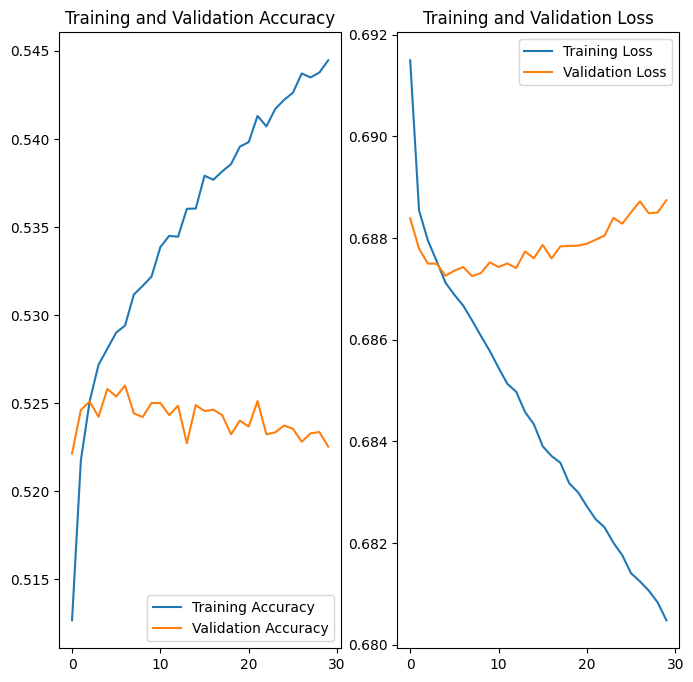

In [ ]:
# Graph Training and Validation accuracy and loss

acc = nn_model1_history.history['accuracy']
val_acc = nn_model1_history.history['val_accuracy']

loss = nn_model1_history.history['loss']
val_loss = nn_model1_history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h5><strong>Predicting overall win rate of deck A vs deck B</strong></h5>

<h5>Neural Network</h5>

In [38]:
# Define all needed functions/methods

Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Model = tf.keras.models.Model
Sequential = tf.keras.Sequential

In [ ]:
# Define neural Network Model

num_features = X2_train.shape[1]

nn_model2 = Sequential([
    Dense(256, input_dim=num_features, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

print(nn_model.summary())

c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        57,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,305 (384.00 KB)

 Trainable params: 98,305 (384.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train neural network with our data

epochs = 30

nn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model2_history = nn_model2.fit(x=X2_train, y=y2_train, validation_split=0.2, epochs=epochs, batch_size=512, verbose=1)

Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5334 - loss: 0.6881 - val_accuracy: 0.5694 - val_loss: 0.6746
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5788 - loss: 0.6690 - val_accuracy: 0.5919 - val_loss: 0.6624
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5968 - loss: 0.6598 - val_accuracy: 0.5993 - val_loss: 0.6602
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6057 - loss: 0.6545 - val_accuracy: 0.6038 - val_loss: 0.6566
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6133 - loss: 0.6502 - val_accuracy: 0.6053 - val_loss: 0.6549
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6163 - loss: 0.6473 - val_accuracy: 0.6075 - val_loss: 0.6530
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6207 - loss: 0.6445 - val_accuracy: 0.6080 - val_loss: 0.6517
Epoch 8/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6226 - loss: 0.6422 - val_accuracy: 0.

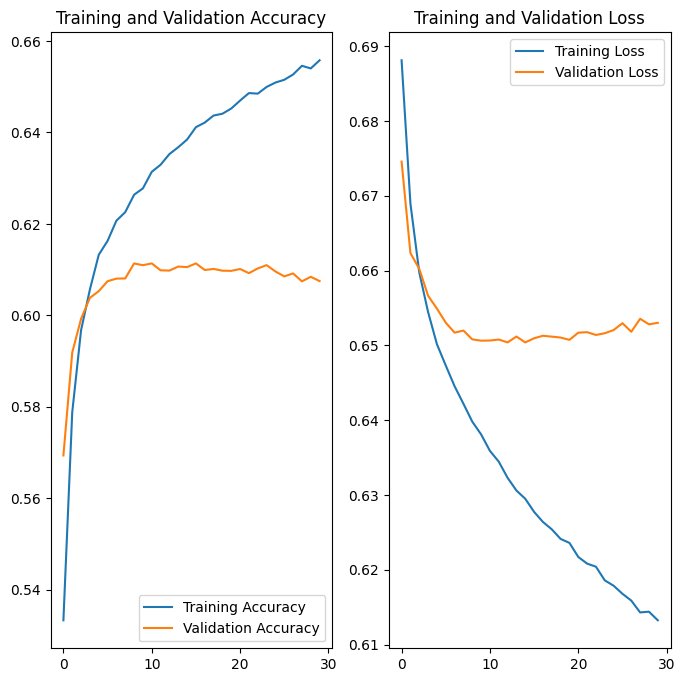

In [ ]:
# Graph Training and Validation accuracy and loss

acc = nn_model2_history.history['accuracy']
val_acc = nn_model2_history.history['val_accuracy']

loss = nn_model2_history.history['loss']
val_loss = nn_model2_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h2><strong>User Functions to Predict Win Rate</strong></h2>

<h5>Elixir Average Function</h5>

In [42]:
# Get Elixr Average Function
def getElixrAvg(deck):
    total = 0

    elixirCost = {
    # Troops
    "Knight": 3,
    "Archers": 3,
    "Goblins": 2,
    "Giant": 5,
    "P.E.K.K.A": 7,
    "Minions": 3,
    "Balloon": 5,
    "Witch": 5,
    "Barbarians": 5,
    "Golem": 8,
    "Skeletons": 1,
    "Valkyrie": 4,
    "Skeleton Army": 3,
    "Bomber": 2,
    "Musketeer": 4,
    "Baby Dragon": 4,
    "Prince": 5,
    "Wizard": 5,
    "Mini P.E.K.K.A": 4,
    "Spear Goblins": 2,
    "Giant Skeleton": 6,
    "Hog Rider": 4,
    "Minion Horde": 5,
    "Ice Wizard": 3,
    "Royal Giant": 6,
    "Guards": 3,
    "Princess": 3,
    "Dark Prince": 4,
    "Three Musketeers": 9,
    "Lava Hound": 7,
    "Ice Spirit": 1,
    "Fire Spirits": 2,
    "Miner": 3,
    "Sparky": 6,
    "Bowler": 5,
    "Lumberjack": 4,
    "Battle Ram": 4,
    "Inferno Dragon": 4,
    "Ice Golem": 2,
    "Mega Minion": 3,
    "Dart Goblin": 3,
    "Goblin Gang": 3,
    "Electro Wizard": 4,
    "Elite Barbarians": 6,
    "Hunter": 4,
    "Executioner": 5,
    "Bandit": 3,
    "Royal Recruits": 7,
    "Night Witch": 4,
    "Bats": 2,
    "Royal Ghost": 3,
    "Ram Rider": 5,
    "Zappies": 4,
    "Rascals": 5,
    "Cannon Cart": 5,
    "Mega Knight": 7,
    "Skeleton Barrel": 3,
    "Flying Machine": 4,
    "Wall Breakers": 2,
    "Royal Hogs": 4,
    "Goblin Giant": 6,
    "Fisherman": 3,
    "Magic Archer": 4,
    "Electro Dragon": 5,
    "Firecracker": 3,
    "Elixir Golem": 3,
    "Battle Healer": 4,
    "Skeleton Dragons": 4,
    "Mother Witch": 4,
    "Electro Spirit": 1,
    "Electro Giant": 8,

    # Buildings
    "Cannon": 3,
    "Goblin Hut": 5,
    "Mortar": 4,
    "Inferno Tower": 5,
    "Bomb Tower": 4,
    "Barbarian Hut": 7,
    "Tesla": 4,
    "Elixir Collector": 6,
    "X-Bow": 6,
    "Tombstone": 3,
    "Furnace": 4,
    "Goblin Cage": 4,

    # Spells
    "Fireball": 4,
    "Arrows": 3,
    "Rage": 2,
    "Rocket": 6,
    "Goblin Barrel": 3,
    "Freeze": 4,
    "Mirror": 1,
    "Lightning": 6,
    "Zap": 2,
    "Poison": 4,
    "Graveyard": 5,
    "The Log": 2,
    "Tornado": 3,
    "Clone": 3,
    "Earthquake": 3,
    "Barbarian Barrel": 2,
    "Heal Spirit": 1,
    "Giant Snowball": 2,
    "Royal Delivery": 3
    }

    # Add to total elixir based on card name
    for card in deck:
        if card in elixirCost.keys():
            total += elixirCost[card]
    
    return round((total / 8), 1)

<h5><strong>Predict Win Rate of a Deck</strong></h5>

<h5>Logistic Regression Model</h5>

In [45]:
# Predict Win Rate of a deck function

def predictWinRateDecklr(deck_cards, deck_levels, desc, desc_values, scaler=scaler1, model=lr_model, feature_columns=X1.columns):
    deck_df = pd.DataFrame(columns=feature_columns)
    deck_df.loc[0] = 0.0

    total_level = sum(deck_levels)
    deck_df.loc[0, 'totalcard_level'] = total_level
    deck_df.loc[0, 'elixir_average'] = getElixrAvg(deck_cards)

    for desc, value in zip(desc, desc_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value

    for card, level in zip(deck_cards, deck_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level
    
    deck_df = pd.DataFrame(scaler.transform(deck_df))
    deck_df.columns = feature_columns

    win_rate = model.predict_proba(deck_df)[0][1]
    
    return round(float(win_rate), 4)

def predictWinRateDecknn(deck_cards, deck_levels, desc, desc_values, scaler=scaler1, model=nn_model1, feature_columns=X1.columns):
    deck_df = pd.DataFrame(columns=feature_columns)
    deck_df.loc[0] = 0.0

    total_level = sum(deck_levels)
    deck_df.loc[0, 'totalcard_level'] = total_level
    deck_df.loc[0, 'elixir_average'] = getElixrAvg(deck_cards)

    for desc, value in zip(desc, desc_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value

    for card, level in zip(deck_cards, deck_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level
    
    deck_df = pd.DataFrame(scaler.transform(deck_df))
    deck_df.columns = feature_columns

    win_rate = model.predict(deck_df)[0][1]
    
    return round(float(win_rate), 4)

In [ ]:
# Example Usage

cards = ['Graveyard', 'Baby Dragon', 'Fireball', 'Knight', 'Ice Spirit', 'Musketeer', 'Goblin Gang', 'Tesla']
levels = [13, 13, 13, 13, 13, 13, 13, 13]
desc = ['troop_count', 'structure_count', 'spell_count', 'common_count', 'rare_count', 'epic_count', 'legendary_count']
desc_values = [6, 1, 1, 4, 2, 1, 1]

win_rate = predictWinRateDecklr(cards, levels, desc, desc_values)
print(f'Predicted win probability (Logstic Regression): {win_rate:.2%}')

win_rate = predictWinRateDecknn(cards, levels, desc, desc_values)
print(f'Predicted win probability (Neural Network): {win_rate:.2%}')

Predicted win probability: 52.66%


AttributeError: 'History' object has no attribute 'predict'

<h5><strong>Predict Win Rate of One Deck Against Another</strong></h5>

<h5>Neural Network Model</h5>

In [ ]:
# Predict Win Rate of Deck A compared to Deck B Function (be user inputted values or pre determined)

def predictWinDeck(deckA_cards=[], deckA_levels=[], descA_values=[], deckB_cards=[], deckB_levels=[], descB_values=[], model=nn_model2, scaler=scaler2, feature_columns=X2.columns):
    # Define a new dataframe with the feature columns
    deck_df = pd.DataFrame(columns=feature_columns)
    deck_df.loc[0] = 0.0

    # Define description values for deck A and B
    desc = ['troop_count', 'structure_count', 'spell_count', 'common_count', 'rare_count', 'epic_count', 'legendary_count']
    descA = ['deckA.' + desc for desc in desc]
    descB = ['deckB.' + desc for desc in desc]

    # User input if there are no parameters or not all parameters are filled out
    if deckA_cards == [] or deckA_levels == [] or descA_values == [] or deckB_cards == [] or deckB_levels == [] or descB_values == []:
        deckA_cards = []
        deckA_levels = []
        descA_values = []
        deckB_cards = []
        deckB_levels = []
        descB_values = []
        
        # Get cards and levels via user input for deck A
        for i in range(8):
            if i == 0:
                card = input('Enter the name of the first card in deck A: ')
            else:
                card = input('Enter the name of the next card in deck A: ')
            level = input('Enter the level of that card: ')
            deckA_cards.append('deckA.' + card)
            deckA_levels.append(float(level))
        
        # Get description values via user input for deck A
        for i in range(7):
            value = input(f'What is the {desc[i]} of deck A: ')
            descA_values.append(float(value))

        # Get cards and levels via user input for deck B
        for i in range(8):
            if i == 0:
                card = input('Enter the name of the first card in deck B: ')
            else:
                card = input('Enter the name of the next card in deck B: ')
            level = input('Enter the level of that card: ')
            deckB_cards.append('deckB.' + card)
            deckB_levels.append(float(level))
        
        # Get description values via user input for deck B
        for i in range(7):
            value = input(f'What is the {desc[i]} of deck B: ')
            descB_values.append(float(value))

    # Append average elixir average to deck A and B descriptions
    deck_df.loc[0, 'deckA.elixir_average'] = getElixrAvg(deckA_cards)
    deck_df.loc[0, 'deckB.elixir_average'] = getElixrAvg(deckB_cards)

    # Get total level and add it to dataframe
    deck_df.loc[0, 'deckA.totalcard_level'] = sum(deckA_levels)
    deck_df.loc[0, 'deckB.totalcard_level'] = sum(deckB_levels)

    # Format cards to match feature names
    deckA_cards = ['deckA.' + card for card in deckA_cards]
    deckB_cards = ['deckB.' + card for card in deckB_cards]

    # Add all values to dataset
    for card, level in zip(deckA_cards, deckA_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level

    for desc, value in zip(descA, descA_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value
    
    for card, level in zip(deckB_cards, deckB_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level

    for desc, value in zip(descB, descB_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value

    # Scale dataset
    deck_df = pd.DataFrame(scaler.transform(deck_df))
    deck_df.columns = feature_columns

    # Predict win rate using dataset
    win_rate = model.predict(deck_df)[0][0]
    
    return round(float(win_rate), 4)

In [ ]:
# Example Usage

cardsA = ['Hog Rider', 'Skeletons', 'Fireball', 'Cannon', 'Ice Spirit', 'Musketeer', 'Ice Golem', 'The Log']
levelsA = [13, 13, 13, 13, 13, 13, 13, 13]
desc_valuesA = [5, 1, 2, 3, 4, 0, 1]

cardsB = ['Graveyard', 'Baby Dragon', 'Fireball', 'Knight', 'Ice Spirit', 'Musketeer', 'Goblin Gang', 'Tesla']
levelsB = [13, 13, 13, 13, 13, 13, 13, 13]
desc_valuesB = [6, 1, 1, 4, 2, 1, 1]

win_rate = predictWinDeck(cardsA, levelsA, desc_valuesA, cardsB, levelsB, desc_valuesB)
# win_rate = predictWinDeck() # For User Input

print(f'Predicted win probability of Deck A against Deck B (Neural Network): {win_rate:.2%}')